In [1]:
# Import pandas 
import pandas as pd 
  
# reading csv file  
df = pd.read_csv("intern_dataset.csv") 
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [ ]:
Lyapunov exponent

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')

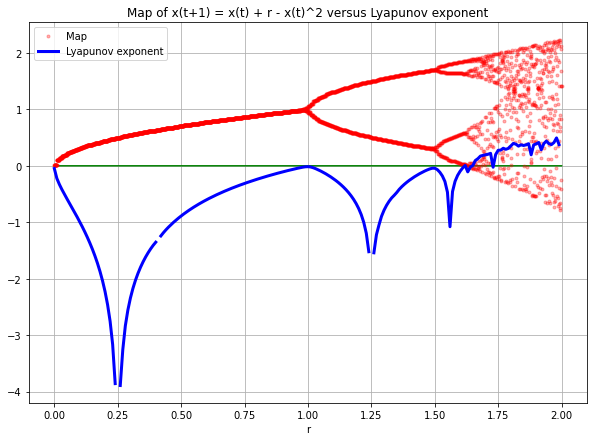

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
# show plots in notebook
%matplotlib inline

result = []
lambdas = []
maps = []

# define range of r 
rvalues = np.arange(0, 2, 0.01)

# loop through r
for r in rvalues:
    x = 0.1
    result = []
    # iterate system 100 times
    for t in range(100):
        x = x + r - x**2
        # calculate log of the absolute of the derivative
        result.append(np.log(abs(1 - 2*x)))
    # take average
    lambdas.append(np.mean(result))
    # for the map ignore first 100 iterations as transient time and iterate anew
    for t in range(20):
        x = x + r - x**2
        maps.append(x)    
    
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(0, 2, 4000)
# zero line
zero = [0]*4000
ax1.plot(xticks, zero, 'g-')
# plot map
ax1.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Map')
ax1.set_xlabel('r')
# plot lyapunov
ax1.plot(rvalues, lambdas, 'b-', linewidth = 3, label = 'Lyapunov exponent')
ax1.grid('on')
ax1.set_xlabel('r')
ax1.legend(loc='best')
ax1.set_title('Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')

In [ ]:
#Code doesn't work
import nolds
h = nolds.lyap_e(df.Signal1)
print(h)

In [ ]:
from dfa import dfa
#from generate import power_law_noise

true_exp = 0.8
x = power_law_noise(2**12, true_exp)
scales, fluct, alpha = dfa(x)
print("True scaling exponent: {}".format(true_exp))
print("Estimated DFA exponent: {}".format(alpha))

In [ ]:
!pip install xdfa
from xdfa import dfa
ff = dfa.fluctuation_function(df.Signal1).set_index("s")["Fluctuation_function"]
ff.plot(loglog=True, legend=True)

In [ ]:
import numpy as np
import entropy
from entropy import *
np.random.seed(123)
x = np.random.rand(100)
print(perm_entropy(df.Signal1))

In [ ]:
import numpy as np
import hfda


#N = np.power(2, 15)
#X = np.sin(np.linspace(0, 1000, N))
k_max = 5

D = hfda.measure(df.Signal1, k_max)

In [ ]:
nolds.examples.plot_lyap(maptype=u'logistic')